In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



# Parsing data

In [3]:
all_sa = list()
all_prices = list()

for j in range(1,120):
    url ='https://www.proway.com.hk/en/property-search/for-rent/house-in-hong-kong?order=prd&page='+str(j)
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    data = soup.find_all('p',class_ = "card-text")
    pricelist = soup.find_all('span',class_ = "price-in-hkd")
    

    for i in range(len(data)):

        data_str = str(data[i]).replace(" ", "").replace("\n","").replace(",","")
        data_num = data_str.split("br")


        if len(data_num)==5:

            sale_area = int(re.findall(r'\d+', data_num[2])[0])


        elif len(data_num)==6:
            
            sale_area = int(re.findall(r'\d+', data_num[1])[0])

        all_sa.append(sale_area)
        

    for i in range(len(pricelist)):

        price_str = str(pricelist[i]).split('>')[1].split('<')[0].replace(',','')
        
        if len(price_str)<7:
            all_prices.append(int(price_str))

In [17]:
dic = dict()
dic["Saleable_area"] = all_sa[1:]
dic['Rental_Prices'] = all_prices[1:-3]

In [52]:
datas = pd.DataFrame(dic)
datas = datas.drop([905,1035,1064])
datas.describe()

,Saleable_area,Rental_Prices
count,2138.000000,2138.000000
mean,1087.391020,57045.995790
std,681.959408,42255.351236
min,213.000000,21000.000000
25%,600.000000,31000.000000
50%,863.500000,44000.000000
75%,1385.000000,68000.000000
max,5134.000000,450000.000000


In [53]:
datas

,Saleable_area,Rental_Prices
0,5134,450000
1,3871,420000
2,3934,380000
3,4542,360000
4,2704,350000
...,...,...
2136,424,21000
2137,397,21000
2138,440,21000
2139,296,21000


# Creating regression model

In [54]:
X = datas[['Saleable_area']]
y = datas[['Rental_Prices']]

regressor = LinearRegression(fit_intercept =True)

regressor.fit(X, y)




LinearRegression()

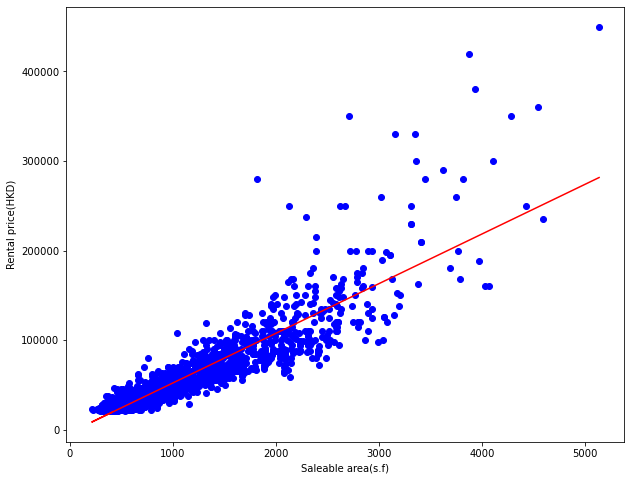

In [58]:
from matplotlib.pyplot import figure

figure(figsize=(10, 8))

plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X) , color = 'red')

plt.xlabel('Saleable area(s.f)')
plt.ylabel('Rental price(HKD)')
plt.show()

In [56]:
regressor.score(X,y)

0.8016704020477916

In [57]:
regressor.predict([[500]])

array([[24458.69282781]])